# Sampyo

1. classification model
2. 7class
3. 2.5% + 5%

## Import module

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import keras
import random

Using TensorFlow backend.
/home/cai/anaconda3/envs/MRCNN/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/cai/anaconda3/envs/MRCNN/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/cai/anaconda3/envs/MRCNN/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/cai/anaconda3/envs/MRCNN/l

## train data / test data

In [3]:
dataset_name = "./crop_dataset_dry"

x_train = []
y_train = []
x_test = []
y_test = []

folder_list = os.listdir(dataset_name)
folder_list.sort()

In [4]:
folder_list

['2.4', '2.6', '2.8', '3.0', '3.2', '3.4', '3.61']

In [5]:
"""folder_list25 = []
folder_list5 = []
for i in folder_list:
    if i[-3] == '.':
        folder_list25.append(i)
    else:
        folder_list5.append(i)"""

"folder_list25 = []\nfolder_list5 = []\nfor i in folder_list:\n    if i[-3] == '.':\n        folder_list25.append(i)\n    else:\n        folder_list5.append(i)"

In [7]:
def CLAHE(img, limit = 2.0, grid = 8):
    clahe = cv2.createCLAHE(clipLimit = limit, tileGridSize = (grid, grid))
    return clahe.apply(img)

for one_folder in folder_list:
    
    eveloped_one_folder = one_folder
    # eveloped_one_folder : classname
    print(one_folder)
    
    join_folder_path = os.path.join(dataset_name, one_folder)
    # dataset folder path
    data_list = os.listdir(join_folder_path)
    # data list in folder
    
    ## train / test = 8:2
    test_list = random.sample(data_list, int(len(data_list) * 0.2))

    for one_data in data_list:
        
        join_data_path = os.path.join(join_folder_path, one_data)
        # each data path
        
        ### imread / resize / normalize
        img = cv2.imread(join_data_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (512,512))
        img = CLAHE(img) # apply equalization
        img = np.reshape(img, (512,512,1)) # one channel

        # train
        if not one_data in test_list:
            # if data is not in test_list which is sampled before, add data in x_train, and class in y_train
            x_train.append(img)
            y_train.append(eveloped_one_folder)
            
        elif one_data in test_list:
            x_test.append(img)
            y_test.append(eveloped_one_folder)

            
tmp = [[x,y] for x,y in zip(x_train, y_train)]
random.shuffle(tmp)

x_train = [n[0] for n in tmp]
y_train = [n[1] for n in tmp]
            
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)  
y_test = np.array(y_test)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

2.4
2.6
2.8
3.0
3.2
3.4
3.61
(10088, 512, 512, 1)
(10088,)
(2518, 512, 512, 1)
(2518,)


In [11]:
x_train

array([[[[145],
         [172],
         [155],
         ...,
         [108],
         [ 73],
         [115]],

        [[160],
         [165],
         [172],
         ...,
         [ 57],
         [106],
         [104]],

        [[185],
         [155],
         [100],
         ...,
         [101],
         [108],
         [108]],

        ...,

        [[246],
         [211],
         [226],
         ...,
         [225],
         [156],
         [ 69]],

        [[192],
         [209],
         [238],
         ...,
         [196],
         [218],
         [ 53]],

        [[231],
         [226],
         [192],
         ...,
         [192],
         [220],
         [222]]],


       [[[182],
         [187],
         [202],
         ...,
         [141],
         [122],
         [134]],

        [[ 79],
         [192],
         [156],
         ...,
         [233],
         [212],
         [205]],

        [[ 82],
         [226],
         [209],
         ...,
         [241],
         [

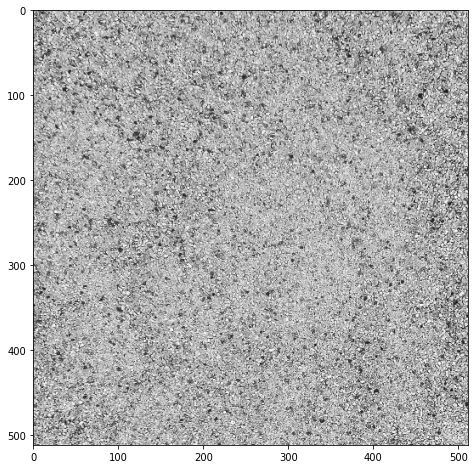

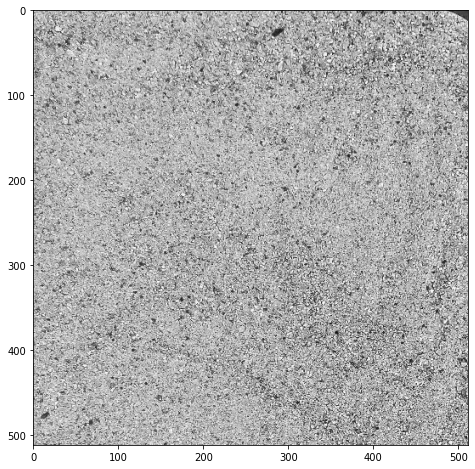

In [12]:
plt.figure(figsize=(8,8))
plt.imshow(x_train[1].reshape(512,512), cmap="gray")

plt.figure(figsize=(8,8))
plt.imshow(x_test[0].reshape(512,512), cmap="gray")

## Y data onehot encoding

* ex1) 2 -> [1,0,0,0,0,0]
* ex2) 7 -> [0,0,0,0,0,1]

In [13]:
from sklearn.preprocessing import OneHotEncoder

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

enc = OneHotEncoder()
enc.fit(y_train)

y_train_onehot = enc.transform(y_train).toarray()
y_test_onehot = enc.transform(y_test).toarray()

print(y_test_onehot)
print(y_test)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
[['2.4']
 ['2.4']
 ['2.4']
 ...
 ['3.61']
 ['3.61']
 ['3.61']]


## Import keras module

In [14]:
import keras

from keras.layers import Conv2D
from keras.layers import MaxPooling2D, LeakyReLU
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Dropout
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization

from keras.utils import multi_gpu_model

from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K

In [21]:
inputs = Input((512, 512, 1))

# Layer 1
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, \
            padding = "same",kernel_initializer="glorot_normal")(inputs)
x = LeakyReLU(alpha = 0.1)(x)
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, \
            padding = "same",kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
x = MaxPooling2D(pool_size = 2, strides = 2)(x)

# Layer 2
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, \
            padding = "same",kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, \
            padding = "same",kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
x = MaxPooling2D(pool_size = 2, strides = 2)(x)

# Layer 3
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, \
            padding = "same",kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, \
            padding = "same",kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
x = MaxPooling2D(pool_size = 2, strides = 2)(x)

# Layer 4
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, \
            padding = "same",kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, \
            padding = "same",kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, \
            padding = "same",kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
x = MaxPooling2D(pool_size = 2, strides = 2)(x)

# Layer 5
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, \
            padding = "same",kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, \
            padding = "same",kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, \
            padding = "same",kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
x = MaxPooling2D(pool_size = 2, strides = 2)(x)

# Layer 6
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, \
            padding = "same",kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, \
            padding = "same",kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, \
            padding = "same",kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
x = MaxPooling2D(pool_size = 2, strides = 2)(x)

# Layer 7
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, \
            padding = "same",kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, \
            padding = "same",kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, \
            padding = "same",kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
x = MaxPooling2D(pool_size = 2, strides = 2, name = 'last_pool')(x)

x = Flatten()(x)
x = Dense(128,kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
x = Dense(64,kernel_initializer="glorot_normal")(x)
x = LeakyReLU(alpha = 0.1)(x)
outputs = Dense(7, activation = 'softmax',kernel_initializer="glorot_normal")(x)

model = Model(inputs=[inputs], outputs=[outputs])

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 512, 512, 1)       0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 512, 512, 128)     1280      
_________________________________________________________________
leaky_re_lu_61 (LeakyReLU)   (None, 512, 512, 128)     0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 512, 512, 128)     147584    
_________________________________________________________________
leaky_re_lu_62 (LeakyReLU)   (None, 512, 512, 128)     0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 256, 256, 128)     0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 256, 256, 128)     147584    
__________

In [23]:
parallel_model = multi_gpu_model(model,gpus=2)

# optimizer
adam = keras.optimizers.Adam(lr=0.000001)
parallel_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

## Deep Learning Model

In [24]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train_onehot,y_val_onehot = train_test_split(x_train,y_train_onehot, test_size = 0.1, shuffle = True, random_state = 42)

In [25]:
#early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor = 'val_loss', verbose = 0, patience = 20, mode = 'auto')

#checkpoint
checkpoint_path = './minyoung_checkpoint/dry--{epoch:04d}.ckpt'
cp_dir = os.path.dirname(checkpoint_path)
checkpoint_5epoch = keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only = True, verbose = 1, period = 50)

In [28]:
history = parallel_model.fit(x_train, y_train_onehot,\
                          epochs=500, batch_size=4,\
                          validation_data=(x_val, y_val_onehot),\
                          callbacks = [checkpoint_5epoch])


Train on 9079 samples, validate on 1009 samples
Epoch 1/500
9079/9079 [==============================] - 258s 28ms/step - loss: 1.9314 - acc: 0.1737 - val_loss: 1.9079 - val_acc: 0.1952
Epoch 2/500
9079/9079 [==============================] - 257s 28ms/step - loss: 1.8036 - acc: 0.2426 - val_loss: 1.7333 - val_acc: 0.2468
Epoch 3/500
9079/9079 [==============================] - 257s 28ms/step - loss: 1.5326 - acc: 0.3379 - val_loss: 1.3937 - val_acc: 0.3964
Epoch 4/500
9079/9079 [==============================] - 257s 28ms/step - loss: 1.3801 - acc: 0.4062 - val_loss: 1.3144 - val_acc: 0.4311
Epoch 5/500
9079/9079 [==============================] - 257s 28ms/step - loss: 1.3075 - acc: 0.4462 - val_loss: 1.2650 - val_acc: 0.4272
Epoch 6/500
9079/9079 [==============================] - 257s 28ms/step - loss: 1.2600 - acc: 0.4690 - val_loss: 1.1864 - val_acc: 0.5173
Epoch 7/500
9079/9079 [==============================] - 257s 28ms/step - loss: 1.2333 - acc: 0.4807 - val_loss: 1.2492 - va

Epoch 116/500
9079/9079 [==============================] - 257s 28ms/step - loss: 0.6470 - acc: 0.7466 - val_loss: 0.6602 - val_acc: 0.7433
Epoch 117/500
9079/9079 [==============================] - 257s 28ms/step - loss: 0.6472 - acc: 0.7428 - val_loss: 0.6316 - val_acc: 0.7602
Epoch 118/500
9079/9079 [==============================] - 257s 28ms/step - loss: 0.6394 - acc: 0.7481 - val_loss: 0.6547 - val_acc: 0.7522
Epoch 119/500
9079/9079 [==============================] - 257s 28ms/step - loss: 0.6375 - acc: 0.7506 - val_loss: 0.6655 - val_acc: 0.7334
Epoch 120/500
9079/9079 [==============================] - 257s 28ms/step - loss: 0.6408 - acc: 0.7493 - val_loss: 0.6687 - val_acc: 0.7374
Epoch 121/500
9079/9079 [==============================] - 258s 28ms/step - loss: 0.6268 - acc: 0.7554 - val_loss: 0.6967 - val_acc: 0.7195
Epoch 122/500
9079/9079 [==============================] - 258s 28ms/step - loss: 0.6284 - acc: 0.7522 - val_loss: 0.6187 - val_acc: 0.7522
Epoch 123/500
9079/9

9079/9079 [==============================] - 258s 28ms/step - loss: 0.3284 - acc: 0.8773 - val_loss: 0.4406 - val_acc: 0.8385
Epoch 231/500
9079/9079 [==============================] - 258s 28ms/step - loss: 0.3235 - acc: 0.8792 - val_loss: 0.4404 - val_acc: 0.8375
Epoch 232/500
9079/9079 [==============================] - 258s 28ms/step - loss: 0.3218 - acc: 0.8809 - val_loss: 0.6148 - val_acc: 0.7760
Epoch 233/500
9079/9079 [==============================] - 258s 28ms/step - loss: 0.3181 - acc: 0.8816 - val_loss: 0.5368 - val_acc: 0.8127
Epoch 234/500
9079/9079 [==============================] - 258s 28ms/step - loss: 0.3127 - acc: 0.8817 - val_loss: 0.5071 - val_acc: 0.8137
Epoch 235/500
9079/9079 [==============================] - 258s 28ms/step - loss: 0.3118 - acc: 0.8834 - val_loss: 0.4496 - val_acc: 0.8385
Epoch 236/500
9079/9079 [==============================] - 258s 28ms/step - loss: 0.3115 - acc: 0.8835 - val_loss: 0.4527 - val_acc: 0.8454
Epoch 237/500
9079/9079 [=========

9079/9079 [==============================] - 258s 28ms/step - loss: 0.1065 - acc: 0.9618 - val_loss: 0.4981 - val_acc: 0.8612
Epoch 345/500
9079/9079 [==============================] - 258s 28ms/step - loss: 0.1168 - acc: 0.9588 - val_loss: 0.5042 - val_acc: 0.8494
Epoch 346/500
9079/9079 [==============================] - 258s 28ms/step - loss: 0.1024 - acc: 0.9652 - val_loss: 0.4950 - val_acc: 0.8533
Epoch 347/500
9079/9079 [==============================] - 258s 28ms/step - loss: 0.1036 - acc: 0.9633 - val_loss: 0.5064 - val_acc: 0.8503
Epoch 348/500
9079/9079 [==============================] - 258s 28ms/step - loss: 0.1096 - acc: 0.9648 - val_loss: 0.5622 - val_acc: 0.8385
Epoch 349/500
9079/9079 [==============================] - 258s 28ms/step - loss: 0.1061 - acc: 0.9629 - val_loss: 0.6507 - val_acc: 0.8276
Epoch 350/500
9076/9079 [============================>.] - ETA: 0s - loss: 0.0983 - acc: 0.9673
Epoch 00350: saving model to ./minyoung_checkpoint/cp--2.5percent800--0350.ckp

Epoch 401/500
9079/9079 [==============================] - 258s 28ms/step - loss: 0.0575 - acc: 0.9825 - val_loss: 0.6905 - val_acc: 0.8325
Epoch 402/500
9079/9079 [==============================] - 258s 28ms/step - loss: 0.0595 - acc: 0.9790 - val_loss: 0.5778 - val_acc: 0.8682
Epoch 403/500
9079/9079 [==============================] - 258s 28ms/step - loss: 0.0548 - acc: 0.9804 - val_loss: 0.6145 - val_acc: 0.8662
Epoch 404/500
9079/9079 [==============================] - 258s 28ms/step - loss: 0.0522 - acc: 0.9838 - val_loss: 0.6666 - val_acc: 0.8533
Epoch 405/500
9079/9079 [==============================] - 258s 28ms/step - loss: 0.0546 - acc: 0.9824 - val_loss: 0.7718 - val_acc: 0.8315
Epoch 406/500
9079/9079 [==============================] - 258s 28ms/step - loss: 0.0538 - acc: 0.9826 - val_loss: 0.6865 - val_acc: 0.8484
Epoch 407/500
9079/9079 [==============================] - 258s 28ms/step - loss: 0.0600 - acc: 0.9842 - val_loss: 0.6072 - val_acc: 0.8612
Epoch 408/500
9079/9

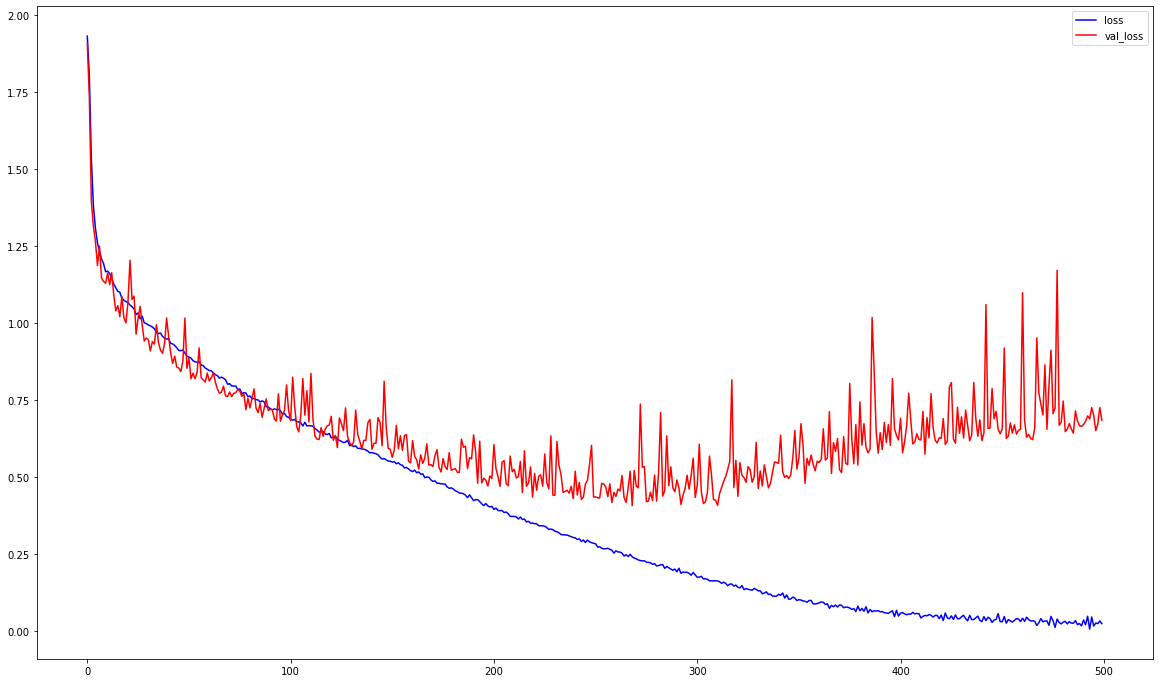

In [29]:
# plot loss & val_loss
plt.figure(figsize=(20,12))
plt.plot(history.history['loss'],'b',label='loss')
plt.plot(history.history['val_loss'],'r',label='val_loss')
#plt.xticks(np.arange(0,50,1))
plt.legend(loc="upper right");

# re train(only you need)

## Predict

In [30]:
pred_y = parallel_model.predict(x_test)


In [31]:
y_test_onehot

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [32]:
pred_y = np.argmax(pred_y,axis=1 )
real_y = np.argmax(y_test_onehot,axis=1)

print(pred_y)
print(real_y)

[0 0 0 ... 6 6 6]
[0 0 0 ... 6 6 6]


In [33]:
corr_num1 = 0
corr_num2 = 0
for i in range(real_y.shape[0]):
    if pred_y[i] == real_y[i]:
        corr_num1 += 1
        
    if abs(int(pred_y[i]) - int(real_y[i])) <= 1:
        corr_num2 += 1
        
print(corr_num1 / real_y.shape[0] * 100, "%")
print(corr_num2 / real_y.shape[0] * 100, "%")

85.02779984114377 %
96.90230341540905 %


## Confusion Matrix

In [34]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(pred_y, real_y)

In [35]:
import seaborn as sn
import pandas as pd


cm_list = []
for one_folder in folder_list:
    splited_folder = one_folder.split("_")
    cm_list.append(splited_folder[1])
    cm_list = set(cm_list)
    cm_list = list(cm_list)
    cm_list.sort()
print(cm_list)
df_cm = pd.DataFrame(conf_mat, index = [i for i in cm_list],
                  columns = [i for i in cm_list])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap="gray")

IndexError: list index out of range

In [ ]:
plt.figure(figsize = (10,8))
sn.heatmap(df_cm, annot=True, cmap="gray", fmt="g")

In [ ]:
model.save("dry2000")